In [1]:
import pandas as pd

# CSV 파일 경로
quasar_file_path = './data/gaia_quasar_below_g_mag_17.csv'
galaxy_file_path = './data/gaia_galaxy_below_g_mag_17.csv'
star_file_path = './data/gaia_star_below_g_mag_7.csv'


# CSV 파일을 읽어서 DataFrame으로 변환
quasar_df = pd.read_csv(quasar_file_path)
galaxy_df = pd.read_csv(galaxy_file_path)
star_df = pd.read_csv(star_file_path)

# 결측치가 있는 행 제거 (모든 열 기준)
'''
quasar_df_clean = quasar_df.dropna()
galaxy_df_clean = galaxy_df.dropna()
star_df_clean = star_df.dropna()
'''

# 일부 행 제거
quasar_df_clean = quasar_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])
galaxy_df_clean = galaxy_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])
star_df_clean = star_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])

star_df_clean = star_df_clean.dropna()


# 데이터 값 변환
quasar_df_clean['mh_gspphot'] = 10 ** quasar_df_clean['mh_gspphot']
galaxy_df_clean['mh_gspphot'] = 10 ** galaxy_df_clean['mh_gspphot']
star_df_clean['mh_gspphot'] = 10 ** star_df_clean['mh_gspphot']


# 데이터 확인
print('quasar',quasar_df_clean.shape)
print('galaxy',galaxy_df_clean.shape)
print('star',star_df_clean.shape)



# 데이터 타입 확인
print(star_df_clean.dtypes)

print(star_df_clean.head())

quasar (7017, 12)
galaxy (6978, 12)
star (7855, 12)
parallax              float64
phot_g_mean_mag       float64
phot_bp_mean_mag      float64
phot_rp_mean_mag      float64
radial_velocity       float64
phot_variable_flag     object
teff_gspphot          float64
logg_gspphot          float64
mh_gspphot            float64
distance_gspphot      float64
azero_gspphot         float64
ag_gspphot            float64
dtype: object
      parallax  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
154  68.000999         3.120973          3.418268          2.910680   
201  23.145108         3.272364          3.439073          3.159316   
215   3.938725         3.304689          3.302995          3.372585   
218  40.327901         3.311102          3.451030          3.189543   
239  43.746746         3.373845          3.534167          3.222478   

     radial_velocity phot_variable_flag  teff_gspphot  logg_gspphot  \
154        13.000446      NOT_AVAILABLE     7498.3286        3.9261   
201  

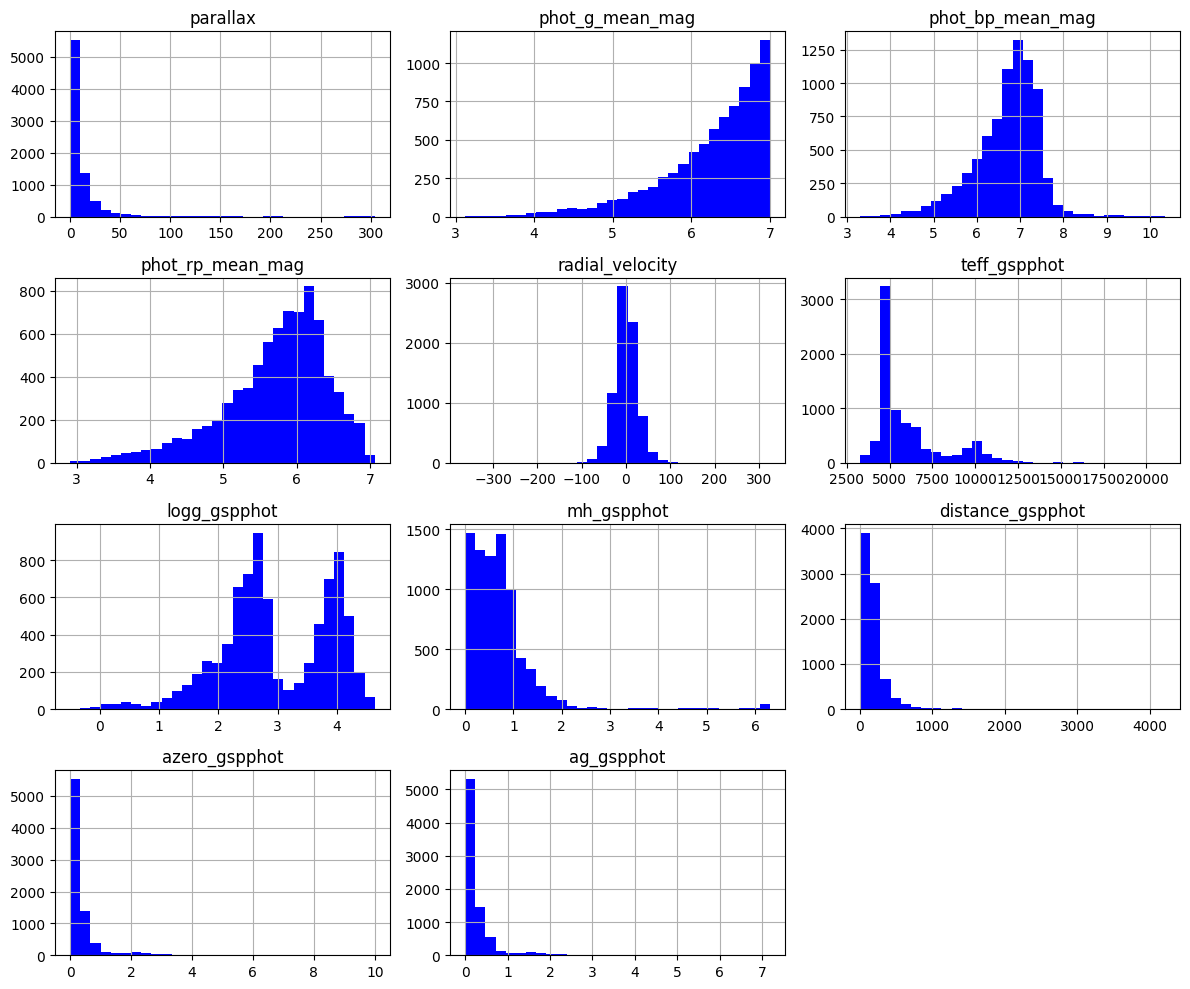

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 모든 수치형 컬럼에 대해 히스토그램 그리기
star_df_clean.hist(bins=30, figsize=(12, 10), color='blue')  # bins는 구간 수
plt.tight_layout()
plt.show()

In [3]:
from sklearn.preprocessing import PowerTransformer

# 원본 복사
star_df_clean_yeojohnson = star_df_clean[['radial_velocity']].copy()

#분포 변환
target_cols = ['parallax', 
               'phot_g_mean_mag',
               'phot_bp_mean_mag',
               'phot_rp_mean_mag',
               'teff_gspphot',
               'logg_gspphot',
               'mh_gspphot',
               'distance_gspphot',
               'azero_gspphot',
               'ag_gspphot'
              ] 

# NaN 제거 (Yeo-Johnson은 NaN 포함 안 됨)
star_df_clean_subset = star_df_clean[target_cols].dropna()

# Yeo-Johnson 변환기 초기화
pt = PowerTransformer(method='yeo-johnson')

# 변환 적용
transformed = pt.fit_transform(star_df_clean_subset)

# 결과를 DataFrame으로 변환
star_df_clean_transformed = pd.DataFrame(transformed, columns=[col for col in star_df_clean_subset.columns], index=star_df_clean_subset.index)

# 변환 결과를 원본 복사본에 추가
star_df_clean_yeojohnson = star_df_clean_yeojohnson.join(star_df_clean_transformed)


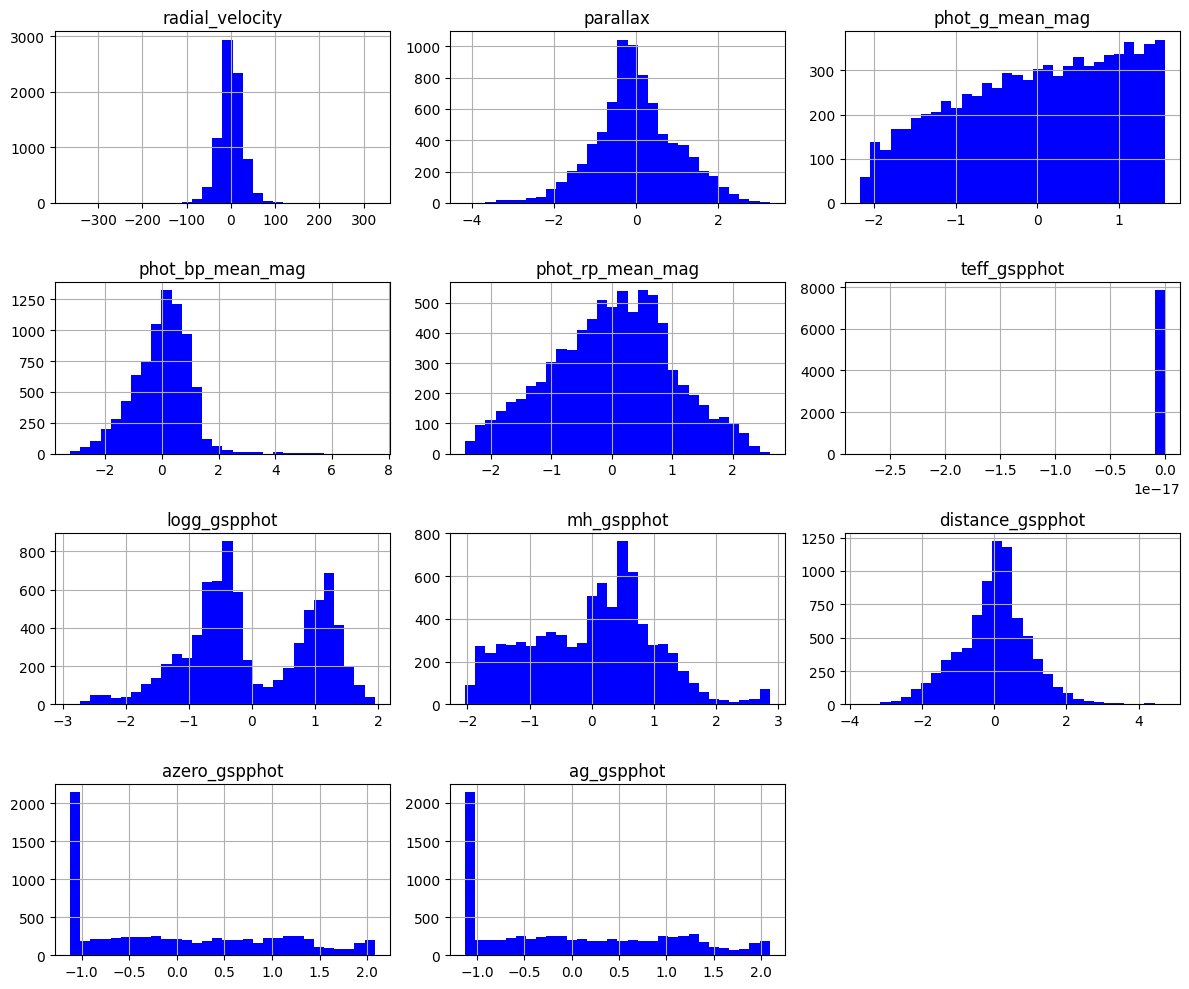

In [4]:
star_df_clean_yeojohnson.hist(bins=30, figsize=(12, 10), color='blue')  # bins는 구간 수
plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 스케일링 대상 컬럼 구분
minmax_cols = ['parallax', 
               'phot_g_mean_mag',
               'phot_bp_mean_mag',
               'phot_rp_mean_mag',
               'teff_gspphot',
               'logg_gspphot',
               'mh_gspphot',
               'distance_gspphot',
               'azero_gspphot',
               'ag_gspphot'
              ] 

rv_scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
scaler_minmax = MinMaxScaler()

scaled_rv_minmax = rv_scaler_minmax.fit_transform(star_df_clean['radial_velocity'].values.reshape(-1, 1))
scaled_minmax = scaler_minmax.fit_transform(star_df_clean[minmax_cols])

# DataFrame으로 변환
star_df_clean_rv_minmax = pd.DataFrame(scaled_rv_minmax, columns=['radial_velocity'])
star_df_clean_minmax = pd.DataFrame(scaled_minmax, columns=minmax_cols)

# only scaled data concat
star_df_clean_scaled = pd.concat([star_df_clean_rv_minmax, star_df_clean_minmax], axis=1)

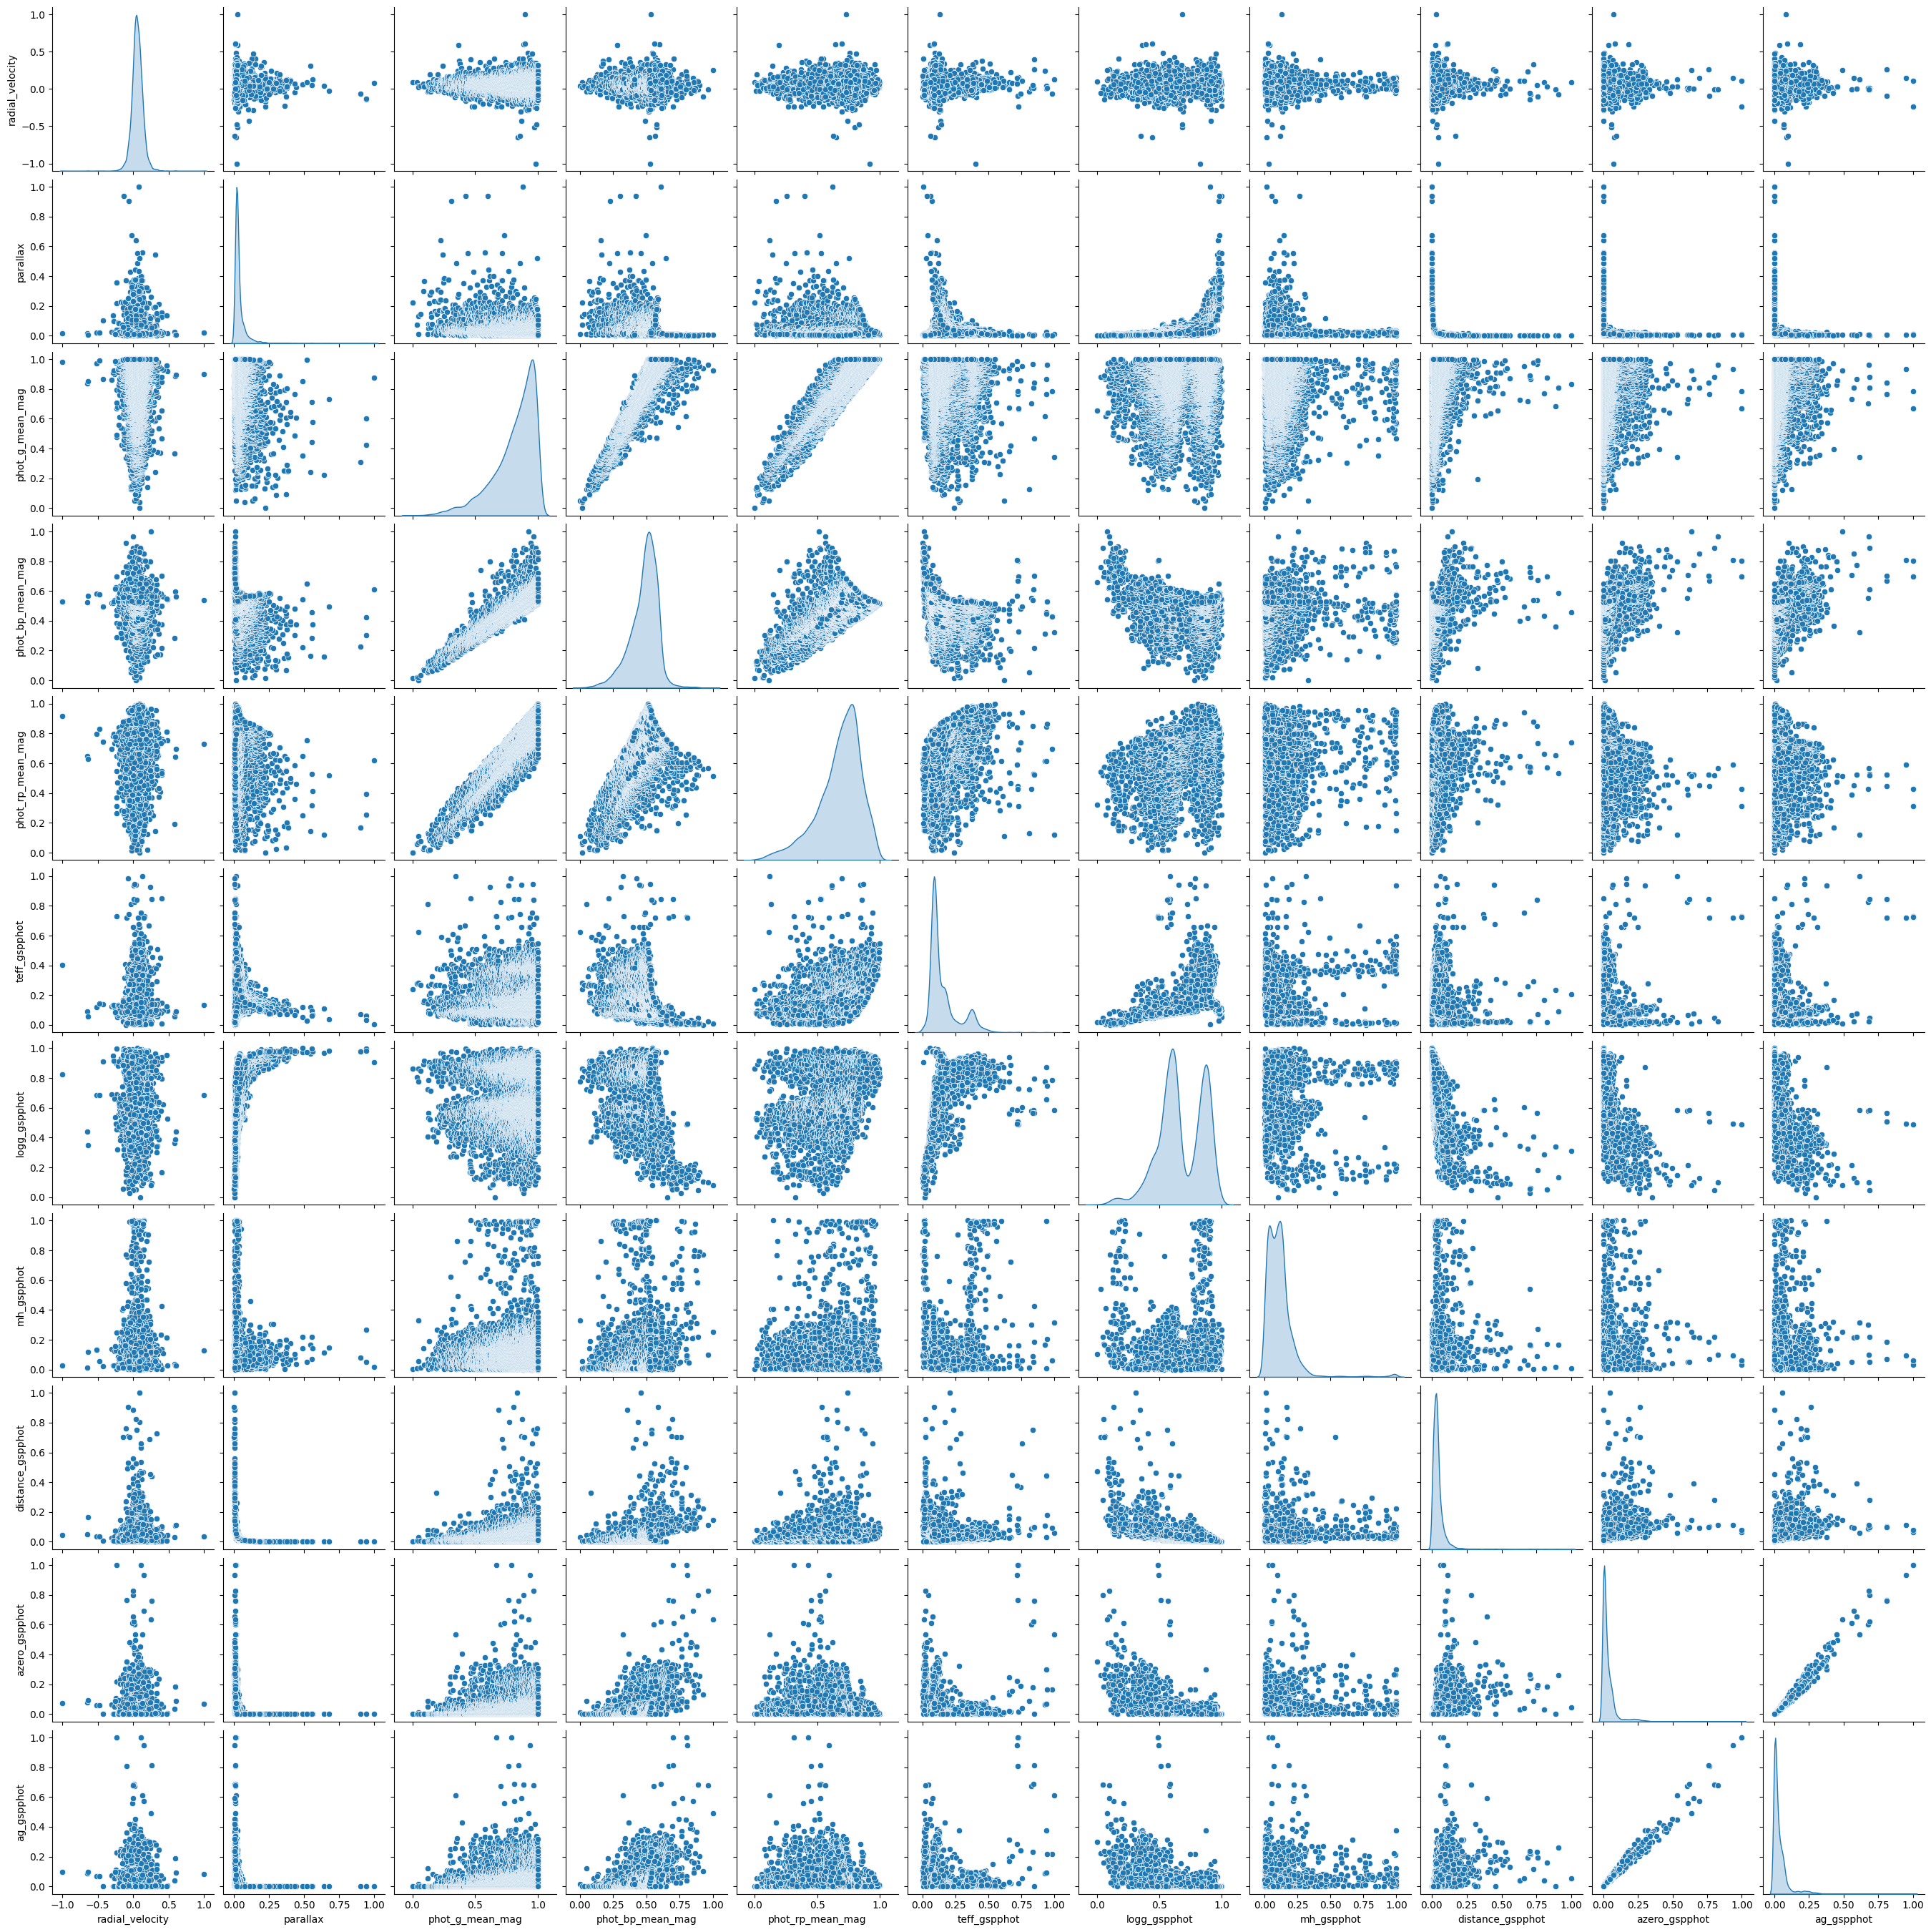

In [6]:
sns.pairplot(star_df_clean_scaled, diag_kind='kde')
plt.show()

In [7]:
star_df_clean_scaled_yeojohnson = star_df_clean_yeojohnson[target_cols].copy()

rv_yj_scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

scaled_rv_yj_minmax = pd.DataFrame(
    rv_yj_scaler_minmax.fit_transform(
        star_df_clean_yeojohnson[['radial_velocity']]
    ),
    columns=['radial_velocity'],
    index=star_df_clean_yeojohnson.index
)

# yeojohnson data concat
star_df_clean_yj_scaled = pd.concat([scaled_rv_yj_minmax, star_df_clean_scaled_yeojohnson], axis=1)

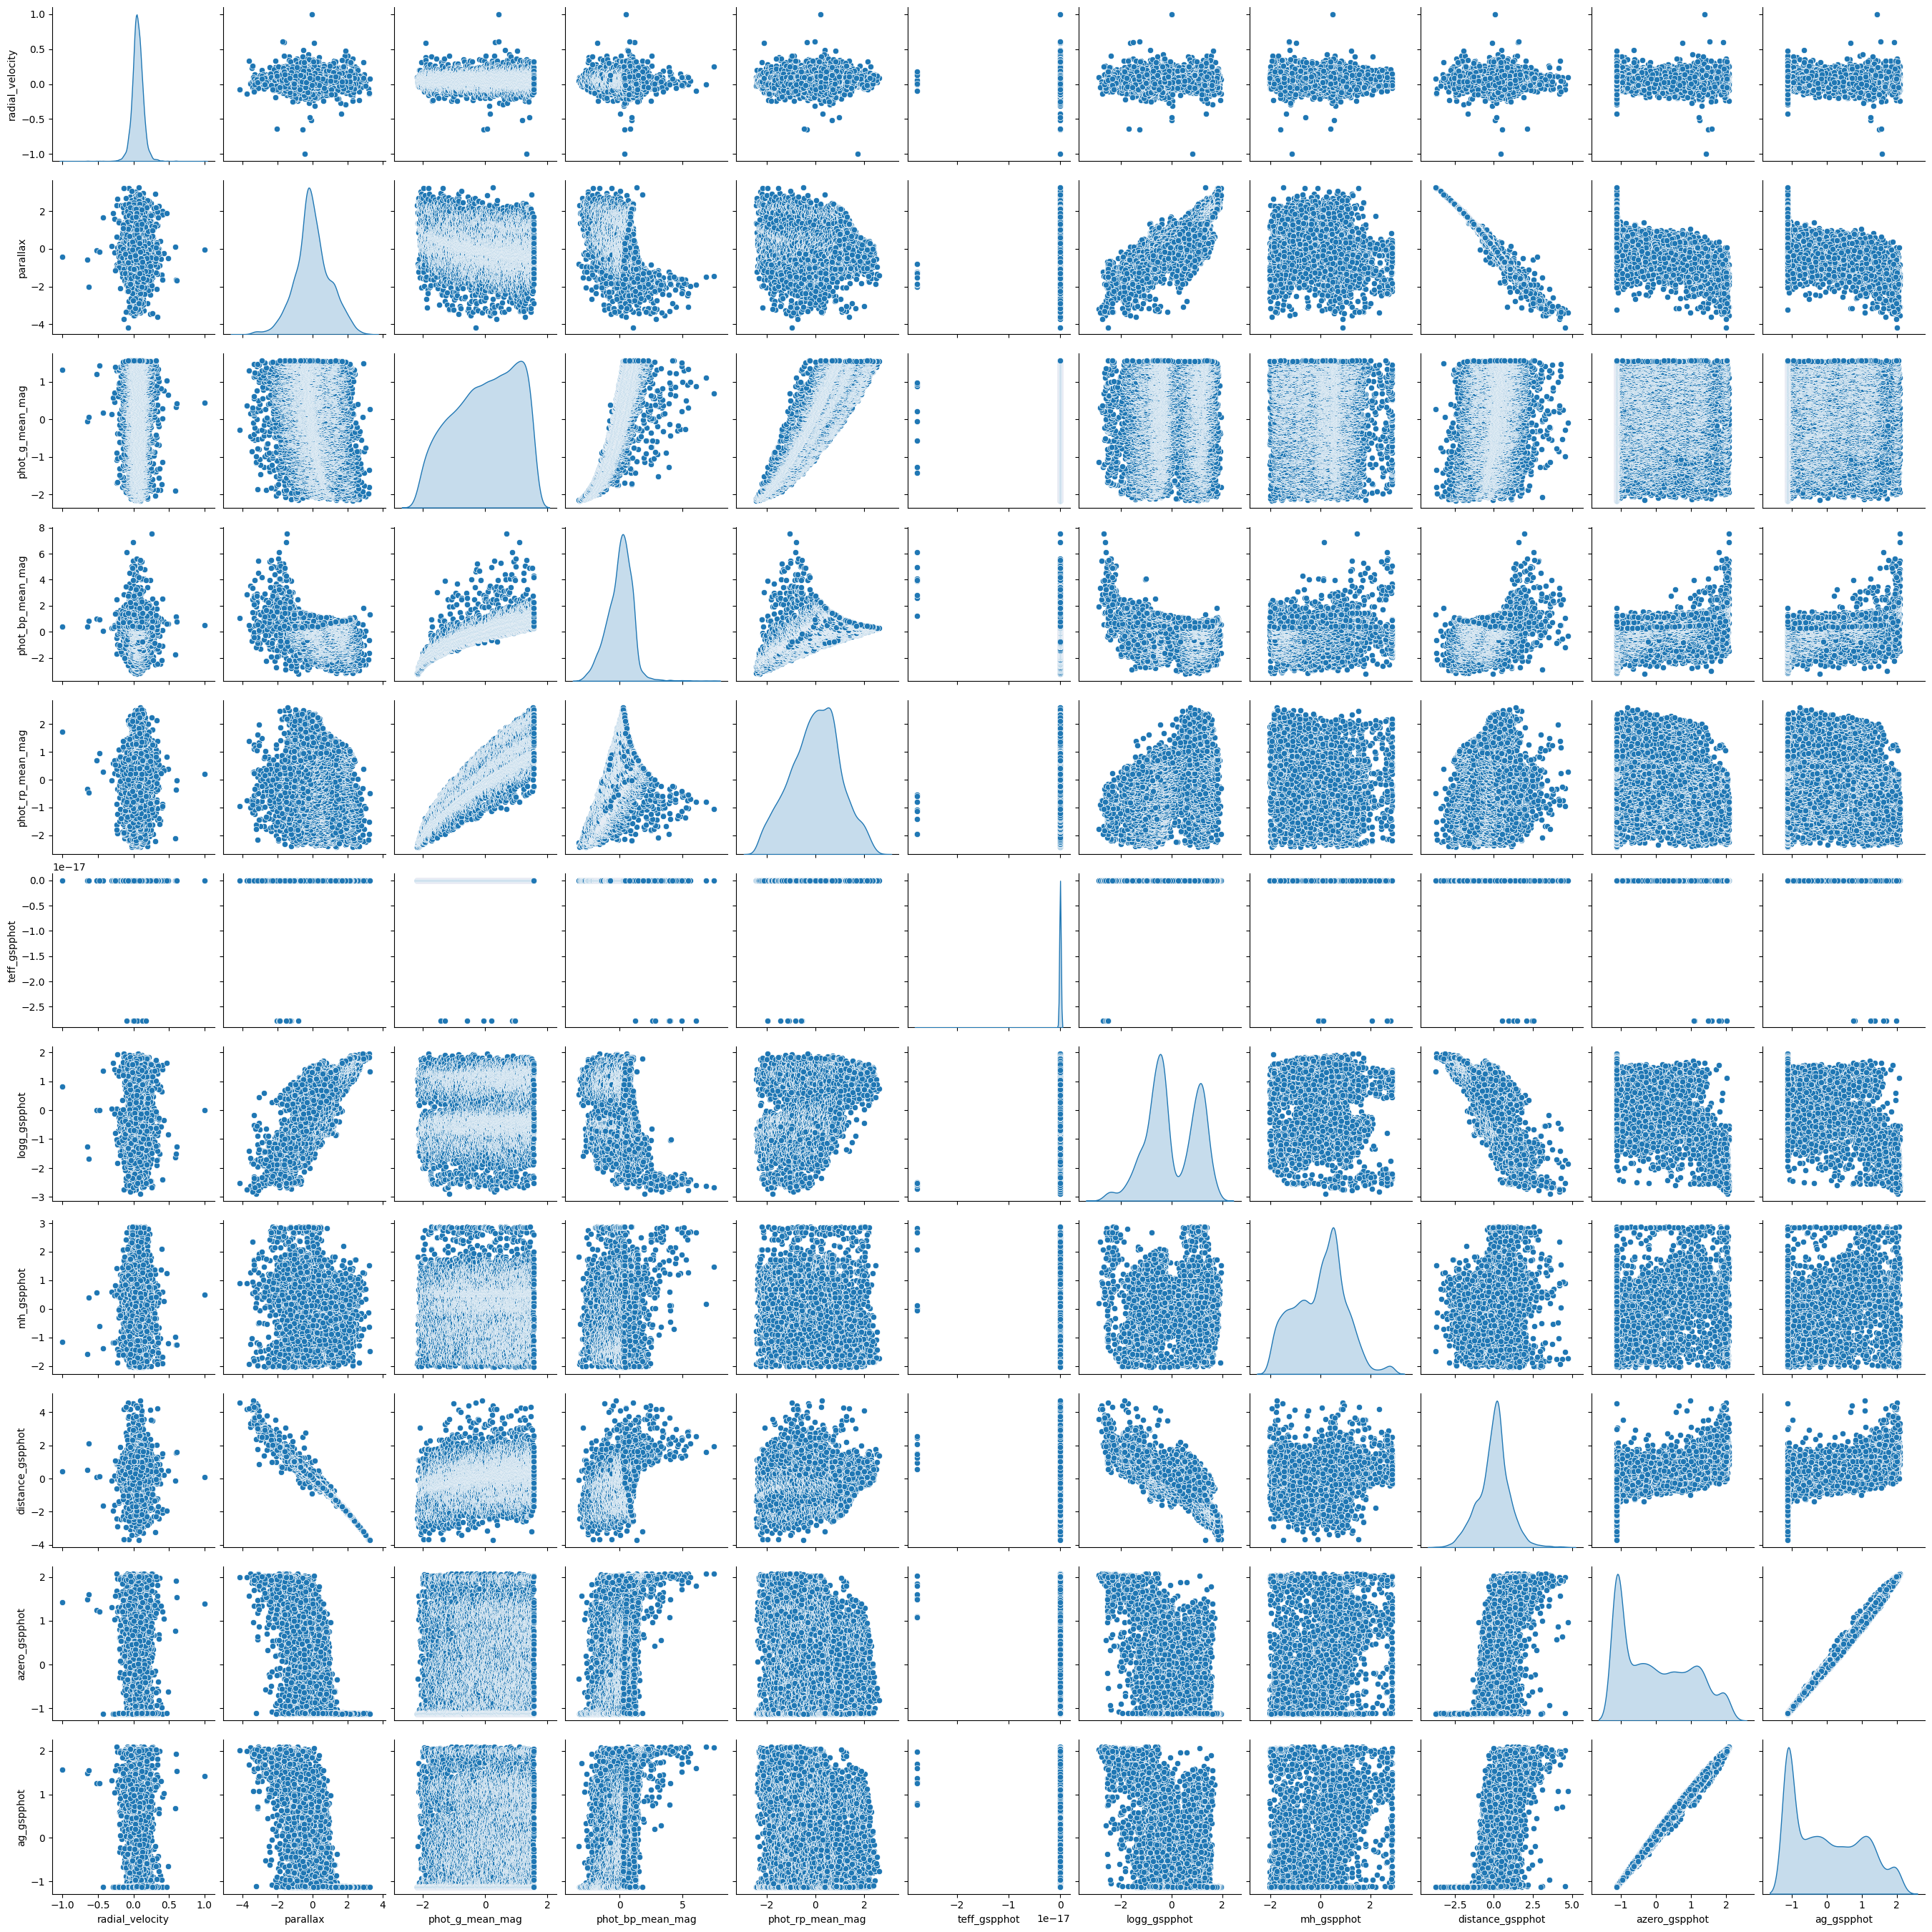

In [8]:
sns.pairplot(star_df_clean_yj_scaled, diag_kind='kde')
plt.show()